In [70]:
import pandas as pd
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [71]:
stock_data=pd.read_csv(r'D:\Data Analysis\Bohubrihi\Resource_File_BHU\Stock Market Data\Stock_Market_Data.csv')
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19


In [72]:
stock_data.shape

(49158, 7)

In [73]:
stock_data.dtypes

Date       object
Name       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

Part 1: Data Cleaning and Exploration

In [74]:
# Converting the 'Date' column to the datatype
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%Y', errors='coerce')

# Set 'Date' column as index
stock_data.set_index('Date', inplace=True)

# Reset index and set again
stock_data.reset_index(inplace=True)
stock_data.set_index('Date', inplace=True)

# Checking the data
print(stock_data.head())

               Name   Open   High    Low  Close      Volume
Date                                                       
2022-01-02  01.Bank  22.83  23.20  22.59  22.93  1842350.41
2022-01-03  01.Bank  23.03  23.29  22.74  22.90  1664989.63
2022-01-04  01.Bank  22.85  23.13  22.64  22.84  1354510.97
2022-01-05  01.Bank  22.91  23.20  22.70  22.98  1564334.81
2022-01-06  01.Bank  23.12  23.65  23.00  23.37  2586344.19


1. Calculate basic summary statistics for each column (mean, median, standard deviation, etc.).

In [6]:
# Summary statistics
summary_stats = stock_data.describe()
print(summary_stats)

               Open          High           Low         Close        Volume
count  49158.000000  49158.000000  49158.000000  49158.000000  4.915800e+04
mean     157.869018    159.588214    155.906364    157.351462  5.619999e+05
std      520.191624    523.348078    517.136149    519.711667  1.276909e+06
min        3.900000      3.900000      3.000000      3.800000  1.000000e+00
25%       19.000000     19.300000     18.700000     19.000000  5.109475e+04
50%       40.300000     41.000000     39.535000     40.100000  1.824160e+05
75%       89.400000     90.500000     87.700000     88.700000  5.401398e+05
max     6000.000000   6050.000000   5975.000000   6000.500000  6.593180e+07


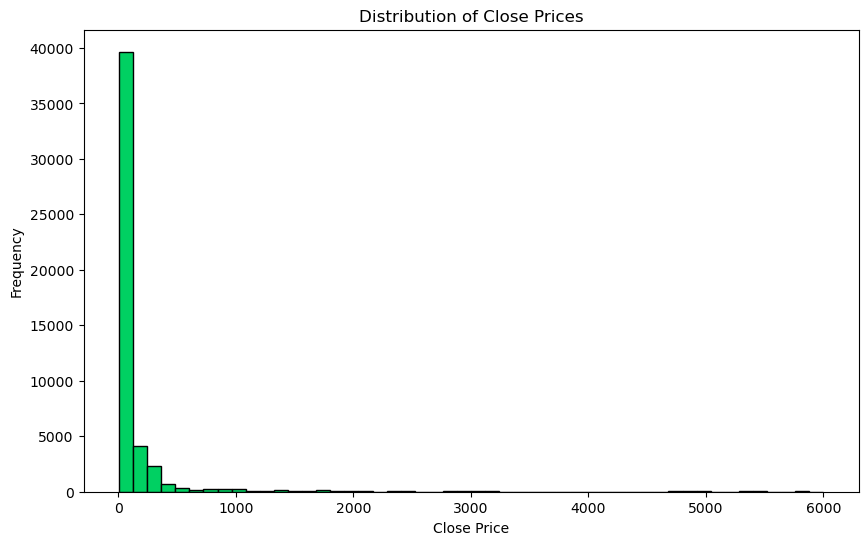

In [67]:
# 2.Explore the distribution of the 'Close' prices over time.

plt.figure(figsize=(10, 6))
plt.hist(stock_data['Close'], bins=50, color='#00d062', edgecolor='black')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

In [8]:
# 3.Identify and analyze any outliers (if any) in the dataset.

outliers = stock_data[(stock_data['Close'] > stock_data['Close'].quantile(0.99)) | (stock_data['Close'] < stock_data['Close'].quantile(0.01))]
print(outliers)

                  Name     Open     High      Low    Close  Volume
Date                                                              
2022-01-02     20.Bond  3634.00  3634.00  3609.00  3617.83   12.00
2022-01-03     20.Bond  4033.88  4040.13  4033.75  4034.50    4.75
2022-01-04     20.Bond  2979.50  2980.00  2930.00  2971.75   58.50
2022-01-05     20.Bond  3988.25  4013.25  3988.25  3998.88   64.25
2022-01-06     20.Bond  4169.00  4213.00  4167.00  4175.10    8.40
...                ...      ...      ...      ...      ...     ...
2022-06-26  UNILEVERCL  2810.10  2846.00  2810.10  2836.50  119.00
2022-06-27  UNILEVERCL  2821.00  2845.00  2821.00  2832.20  217.00
2022-06-28  UNILEVERCL  2840.00  2848.00  2840.00  2847.10  460.00
2022-06-29  UNILEVERCL  2826.00  2855.00  2826.00  2839.00   68.00
2022-06-30  UNILEVERCL  2850.00  2880.00  2828.00  2855.70  239.00

[921 rows x 6 columns]


Part 2: Time Series Analysis / Rolling Window / Moving Averages

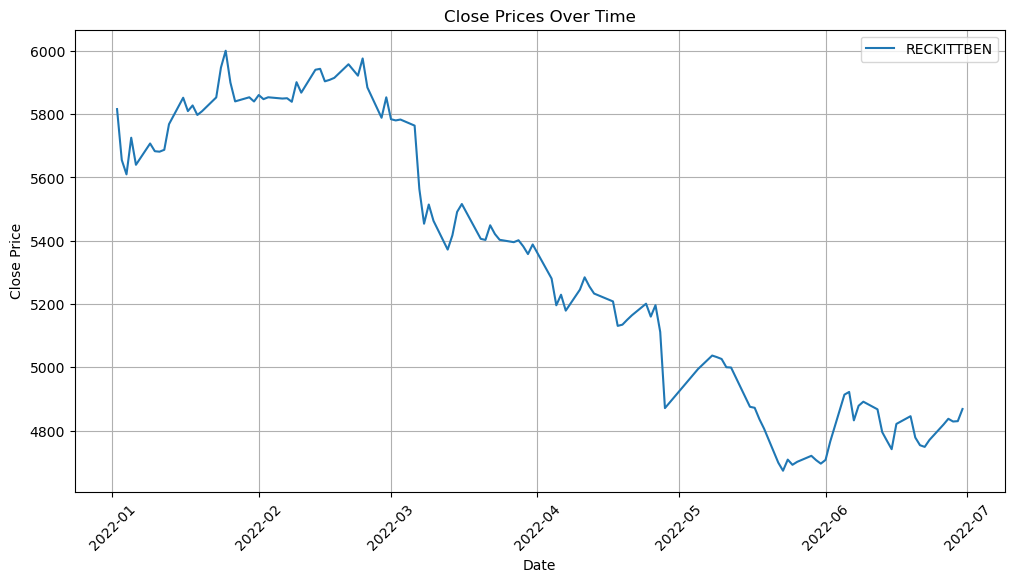

In [15]:
# 1.Create a line chart to visualize the 'Close' prices over time.

plt.figure(figsize=(12, 6))
selected_stocks = ['RECKITTBEN']
for name in selected_stocks:
    specific_data = stock_data[stock_data['Name'] == name]
    plt.plot(specific_data.index, specific_data['Close'], label=name)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

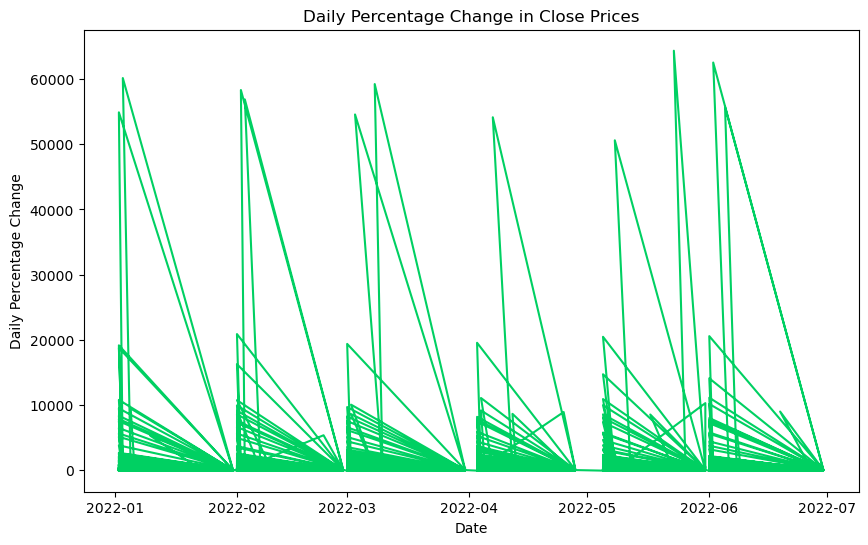

In [78]:
# 2.Calculate and plot the daily percentage change in closing prices.

stock_data['Daily_Pct_Change'] = stock_data['Close'].pct_change() * 100
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Daily_Pct_Change'], color='#00d062')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change')
plt.title('Daily Percentage Change in Close Prices')
plt.show()

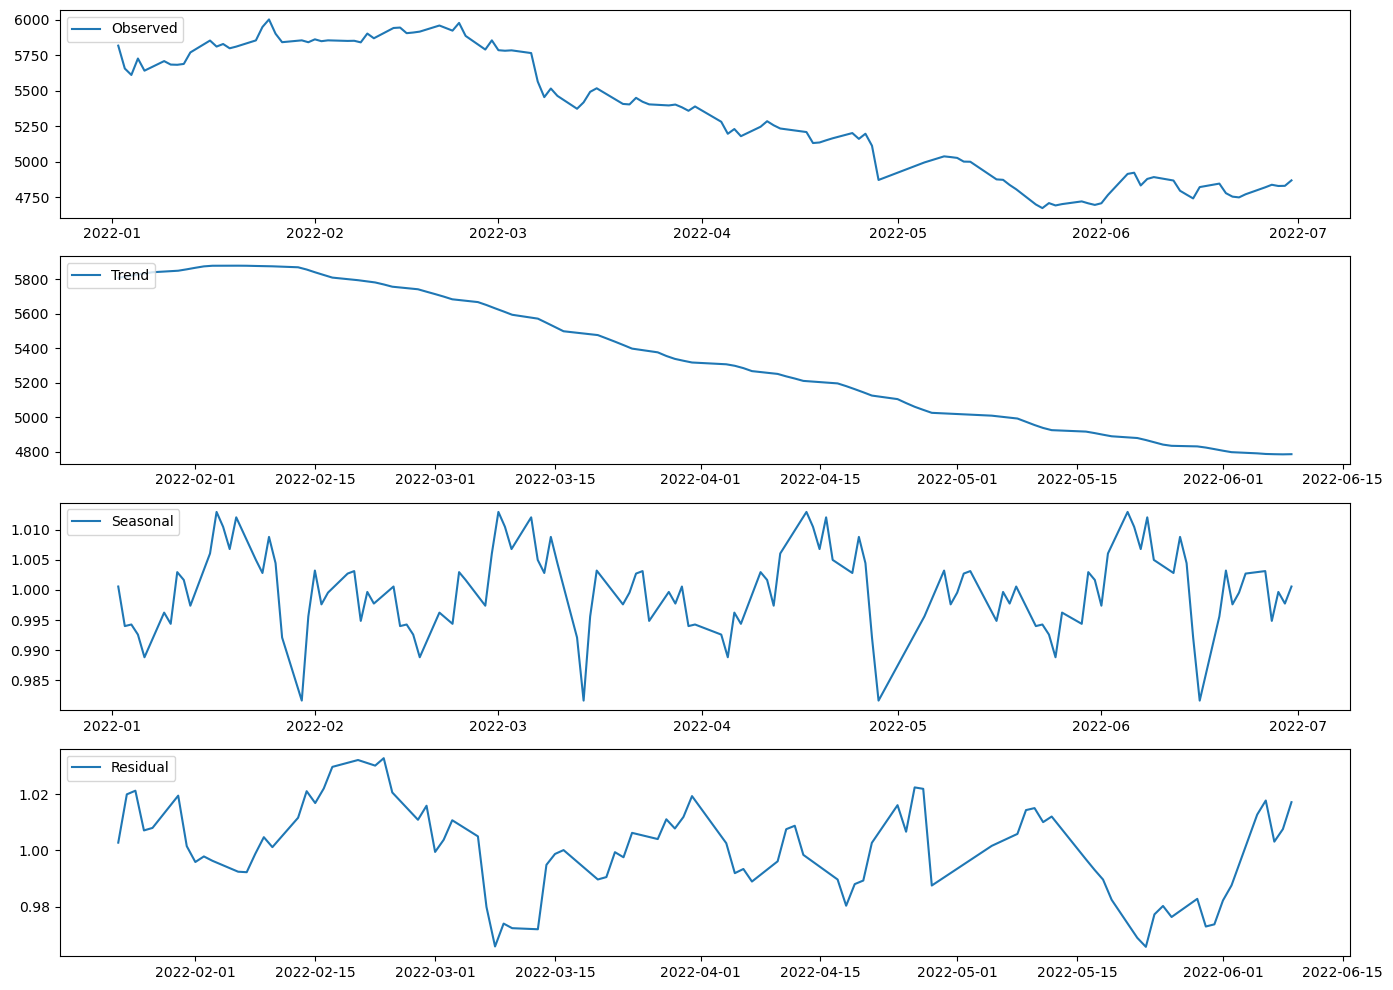

In [18]:
# 3.Investigate the presence of any trends or seasonality in the stock prices.


specific_company = 'RECKITTBEN'
specific_data = stock_data[stock_data['Name'] == specific_company]

if len(specific_data) >= 60:
    result = seasonal_decompose(specific_data['Close'], model='multiplicative', period=30)

    plt.figure(figsize=(14, 10))
    
    plt.subplot(411)
    plt.plot(result.observed, label='Observed')
    plt.legend(loc='upper left')
    
    plt.subplot(412)
    plt.plot(result.trend, label='Trend')
    plt.legend(loc='upper left')
    
    plt.subplot(413)
    plt.plot(result.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    
    plt.subplot(414)
    plt.plot(result.resid, label='Residual')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough data for {specific_company}. Please choose a stock with more data.")

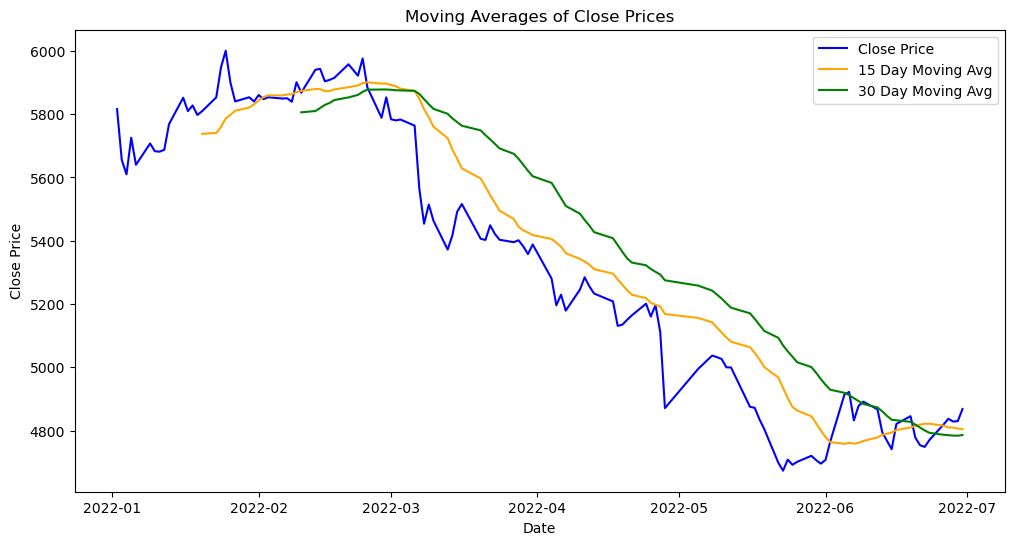

In [19]:
# 4.Apply moving averages to smooth the time series data in 15/30 day intervals against the original graph.

plt.figure(figsize=(12, 6))
plt.plot(specific_data.index, specific_data['Close'], label='Close Price', color='blue')
plt.plot(specific_data.index, specific_data['Close'].rolling(window=15).mean(), label='15 Day Moving Avg', color='orange')
plt.plot(specific_data.index, specific_data['Close'].rolling(window=30).mean(), label='30 Day Moving Avg', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Moving Averages of Close Prices')
plt.legend()
plt.show()

In [20]:
# 5.Calculate the average closing price for each stock.

average_closing_price = stock_data.groupby('Name')['Close'].mean().reset_index()
average_closing_price.columns = ['Name', 'Avg_Close_Price']
print(average_closing_price)

                          Name  Avg_Close_Price
0                      01.Bank        21.260902
1                    02.Cement        96.600820
2           03.Ceramics_Sector        71.225164
3               04.Engineering       132.352459
4    05.Financial_Institutions        29.253525
..                         ...              ...
407                 WMSHIPYARD        12.370492
408                        YPL        21.339344
409                 ZAHEENSPIN         9.964754
410                   ZAHINTEX         7.858197
411                 ZEALBANGLA       150.338525

[412 rows x 2 columns]


In [21]:
# 6.Identify the top 5 and bottom 5 stocks based on average closing price.

top_5_stocks = average_closing_price.nlargest(5, 'Avg_Close_Price')
bottom_5_stocks = average_closing_price.nsmallest(5, 'Avg_Close_Price')
print("Top 5 Stocks:\n", top_5_stocks)
print("Bottom 5 Stocks:\n", bottom_5_stocks)

Top 5 Stocks:
            Name  Avg_Close_Price
56    APSCLBOND      5413.238636
320  RECKITTBEN      5342.024793
298   PREBPBOND      4918.357143
178  IBBL2PBOND      4851.330357
283    PBLPBOND      4836.195652
Bottom 5 Stocks:
            Name  Avg_Close_Price
144   FAMILYTEX         4.698361
187    ICBIBANK         4.725620
149       FBFIF         5.289344
293  POPULAR1MF         5.368033
291      PHPMF1         5.417213


Part 3: Volatility Analysis

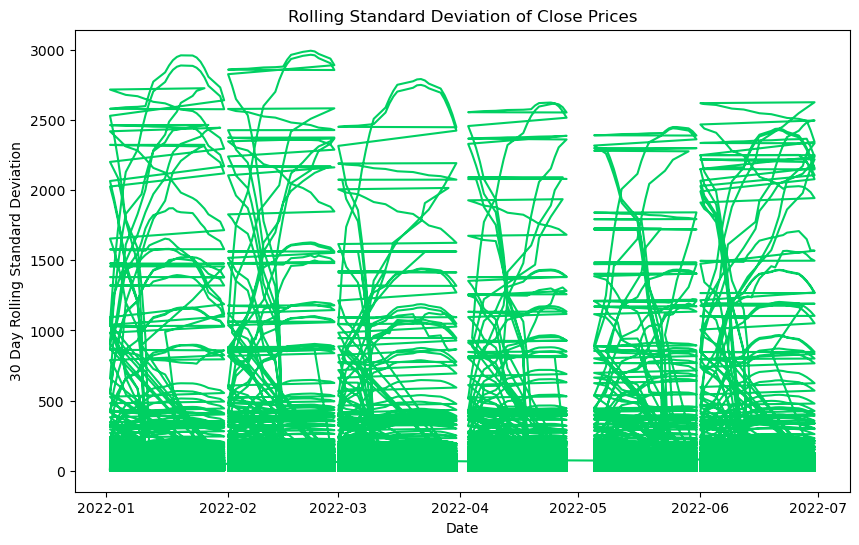

In [55]:
# 1.Calculate and plot the rolling standard deviation of the 'Close' prices.

stock_data['Rolling_Std_Dev'] = stock_data['Close'].rolling(window=30).std()
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Rolling_Std_Dev'], color='#00d062')
plt.xlabel('Date')
plt.ylabel('30 Day Rolling Standard Deviation')
plt.title('Rolling Standard Deviation of Close Prices')
plt.show()

In [25]:
# 2.Create a new column for daily price change (Close - Open).

stock_data['Daily_Price_Change'] = stock_data['Close'] - stock_data['Open']
print(stock_data['Daily_Price_Change'].describe())


count    49158.000000
mean        -0.517556
std          6.400391
min       -189.200000
25%         -0.800000
50%         -0.100000
75%          0.200000
max        187.000000
Name: Daily_Price_Change, dtype: float64


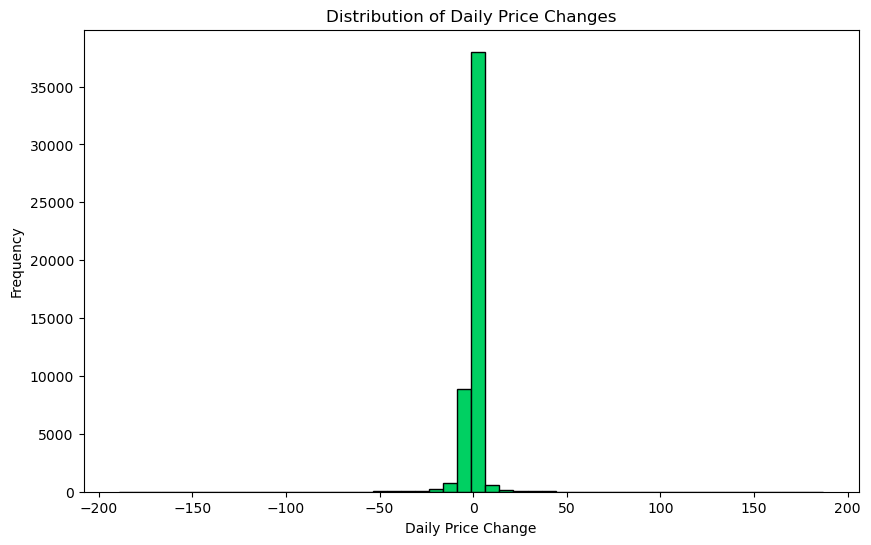

In [56]:
# 3.Analyze the distribution of daily price changes.

plt.figure(figsize=(10, 6))
plt.hist(stock_data['Daily_Price_Change'], bins=50, color='#00d062', edgecolor='black')
plt.title('Distribution of Daily Price Changes')
plt.xlabel('Daily Price Change')
plt.ylabel('Frequency')
plt.show()

In [27]:
# 4.Identify days with the largest price increases and decreases.

largest_increases = stock_data.nlargest(5, 'Daily_Price_Change')
largest_decreases = stock_data.nsmallest(5, 'Daily_Price_Change')
print("Largest Increases:\n", largest_increases)
print("Largest Decreases:\n", largest_decreases)

Largest Increases:
                   Name    Open    High     Low   Close  Volume  \
Date                                                             
2022-06-29  SJIBLPBOND  4710.0  4899.0  4710.0  4897.0   101.0   
2022-06-27   PREBPBOND  4900.0  5050.0  4900.0  5045.5    72.0   
2022-06-21   PREBPBOND  4900.0  5050.0  4900.0  5041.5    36.0   
2022-01-05  RECKITTBEN  5600.0  5738.8  5600.0  5725.6   323.0   
2022-06-30  IBBL2PBOND  5100.0  5260.0  5070.0  5224.5   125.0   

            Daily_Pct_Change  Rolling_Std_Dev  Daily_Price_Change  
Date                                                               
2022-06-29          4.950707      2184.394521               187.0  
2022-06-27          2.969388      2172.115420               145.5  
2022-06-21          2.365482      1816.563627               141.5  
2022-01-05          2.062425      1944.668867               125.6  
2022-06-30          3.047337      2496.570073               124.5  
Largest Decreases:
                   Nam

In [28]:
# 5.Identify stocks with unusually high trading volume on certain days.

high_volume_days = stock_data[stock_data['Volume'] > stock_data['Volume'].quantile(0.95)]
print(high_volume_days)

                                 Name   Open   High    Low  Close      Volume  \
Date                                                                            
2022-01-06                    01.Bank  23.12  23.65  23.00  23.37  2586344.19   
2022-01-31                    01.Bank  22.62  22.79  22.28  22.45  2844397.21   
2022-01-12         03.Ceramics_Sector  76.46  79.04  75.30  77.32  3148906.60   
2022-01-16         03.Ceramics_Sector  78.06  81.36  76.96  79.48  3351889.00   
2022-01-05  15.Services_&_Real_Estate  52.60  54.48  52.38  53.13  2621104.25   
...                               ...    ...    ...    ...    ...         ...   
2022-06-12                        YPL  21.90  22.20  21.90  22.00  2363427.00   
2022-06-16                        YPL  22.80  23.70  22.80  23.30  3394619.00   
2022-06-28                        YPL  22.80  23.60  21.90  23.60  6145142.00   
2022-06-29                        YPL  24.30  24.60  23.30  23.40  4463125.00   
2022-06-30                  

Part 4: Correlation and Heatmaps

In [29]:
# 1.Explore the relationship between trading volume and volatility.

correlation_volume_volatility = stock_data[['Volume', 'Rolling_Std_Dev']].corr()
print(correlation_volume_volatility)

                   Volume  Rolling_Std_Dev
Volume           1.000000        -0.028826
Rolling_Std_Dev -0.028826         1.000000


In [30]:
# 2.Calculate the correlation matrix between the 'Open' & 'High', 'Low' &'Close' prices.

correlation_matrix = stock_data[['Open', 'High', 'Low', 'Close']].corr()
print(correlation_matrix)

           Open      High       Low     Close
Open   1.000000  0.999940  0.999939  0.999925
High   0.999940  1.000000  0.999887  0.999942
Low    0.999939  0.999887  1.000000  0.999961
Close  0.999925  0.999942  0.999961  1.000000


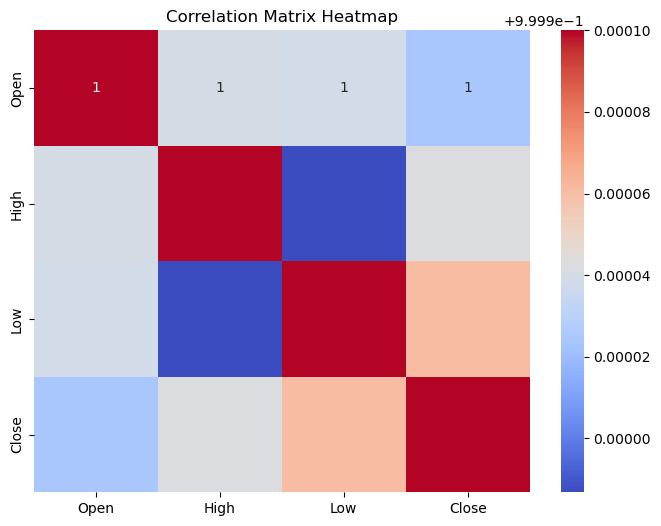

In [31]:
# 3.Create a heatmap to visualize the correlations using the seaborn package.


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Bonus Task:

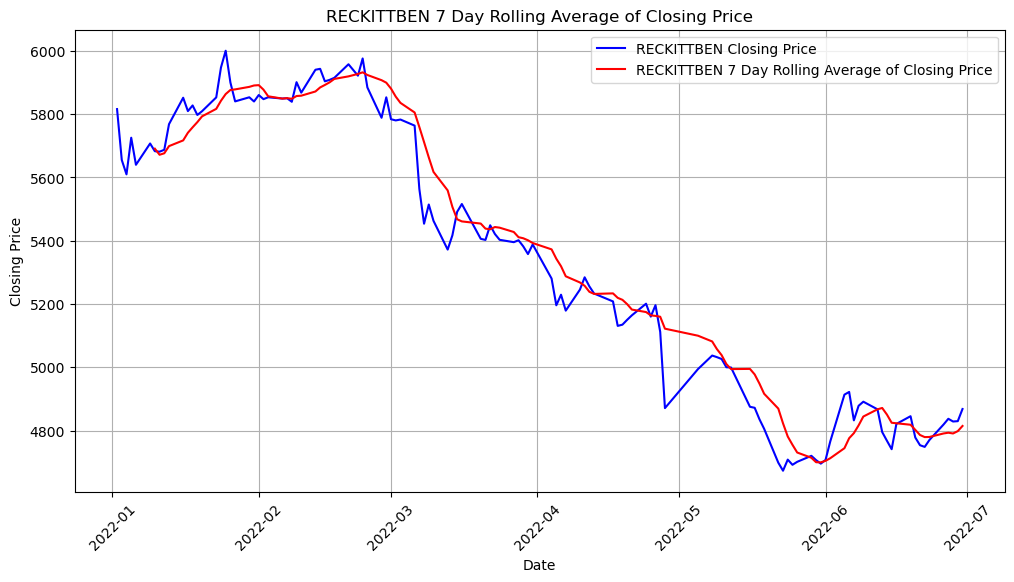

In [76]:
# During the rolling window analysis, we encountered a warning. Find out what's causing this & apply a fix to avoid the warning.

specific_data.loc[:, '7_Day_Rolling_Avg'] = specific_data['Close'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(specific_data.index, specific_data['Close'], label=f'{specific_company} Closing Price', color='blue')
plt.plot(specific_data.index, specific_data['7_Day_Rolling_Avg'], label=f'{specific_company} 7 Day Rolling Average of Closing Price', color='red')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{specific_company} 7 Day Rolling Average of Closing Price')
plt.grid()
plt.legend()

plt.xticks(rotation=45)
plt.show()

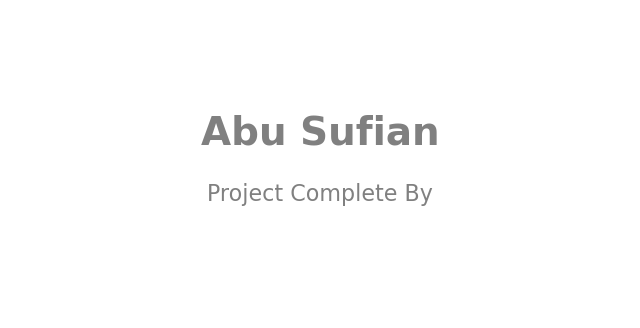

In [77]:
from matplotlib.patches import FancyBboxPatch

name = "Abu Sufian"
project_text = "Project Complete By"
fig, ax = plt.subplots(figsize=(8, 4))
plt.text(0.5, 0.6, name, fontsize=28, ha='center', va='center', color='grey', fontweight='bold')
plt.text(0.5, 0.4, project_text, fontsize=16, ha='center', va='center', color='grey')
plt.axis('off')
plt.show()